In [1]:
import os
import pandas as pd
from MulticoreTSNE import MulticoreTSNE as TSNE
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Train a model and Visualize the vectors. 

In [2]:
!mkdir -p sandbox #let's put all stuff in the sandbox
os.chdir("sandbox")

### Download a toy dataset which is describled in

    "Detection of low-abundance bacterial strains in metagenomic datasets by eigengenome partitioning." 
    Nature biotechnology 33.10 (2015): 1053.

In [3]:
if not os.path.exists('lsaTestData.tar.gz'):
    !wget https://github.com/brian-cleary/LatentStrainAnalysis/raw/master/testData.tar.gz -O lsaTestData.tar.gz

--2019-12-06 21:39:50--  https://github.com/brian-cleary/LatentStrainAnalysis/raw/master/testData.tar.gz
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/brian-cleary/LatentStrainAnalysis/master/testData.tar.gz [following]
--2019-12-06 21:39:50--  https://raw.githubusercontent.com/brian-cleary/LatentStrainAnalysis/master/testData.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17790844 (17M) [application/octet-stream]
Saving to: ‘lsaTestData.tar.gz’

lsaTestData.tar.gz  100%[===================>]  16.97M  3.51MB/s    in 4.9s    

2019-12-06 21:39:56 (3.44 MB/s) - ‘lsaTestData.tar.gz’ saved [17790844/17790844]



In [4]:
!tar xf lsaTestData.tar.gz >  /dev/null  2>&1
!cat original_reads/SRR*.fastq > data.fastq 

### convert fastq file to a seq file ( tabular format)

In [6]:
!python ../../scripts/fastseq/fastqToSeq.py -i data.fastq -o data.seq

In [8]:
!head -n 3 data.seq

1	SRR492065.1.1 HWI-EAS385_0095_FC:2:1:6702:1434 length=100	TCAGCCATCGCTATGCTTGGCTTCACTGTGAAGACCACTCCAATCGCGACTTGTCACGATTGTCGTTACCATTAAANNNNNGAAAACAGGAGAACAAGTA
2	SRR492065.1.2 HWI-EAS385_0095_FC:2:1:6702:1434 length=100	AAANNNNNAAAAGGCAGGCCGNNNNNNNNNNCTGGTGCAGGAATGNNNNNNATAATTGTTTCAAAAAGTGGATCCATTGAAGTCATTTCATCATCTAAAT
3	SRR492065.2.1 HWI-EAS385_0095_FC:2:1:6931:1435 length=100	GCAATAGCAGGCTCACCGACTGTGATTTTACTAGAATTTCCAAACTCAGCGACTTGATCAACTTTGTCGGAAGAAANNNNNATCACGGCTAAATCCGTAT


### create hash function and hash  reads

In [9]:
!python ../../scripts/fastseq/hashSeq.py -i data.seq --hash lsh -o data.hash -k 15

2019-12-06 21:42:29,574 - hashSeq - INFO - start converting...
2019-12-06 21:42:29,574 - hashSeq - INFO - parameters: {'f': <function convert.<locals>.f at 0x7f5c0fe6b950>, 'lsh_file': '', 'create_lsh_only': False, 'batch_size': 100000, 'hash_size': 22, 'out_file': 'data.hash', 'in_file': 'data.seq', 'n_thread': 7, 'kmer_size': 15, 'hash_fun': 'lsh', 'bucket': 20000000}
2019-12-06 21:42:29,574 - hashSeq - INFO - creating hash ...
100%|██████████████████████████████████████| 660/660 [00:00<00:00, 14404.57it/s]
2019-12-06 21:42:29,809 - hashSeq - INFO - finish creating hash ...
100%|█████████████████████████████████| 100000/100000 [00:33<00:00, 2953.36it/s]
2019-12-06 21:43:13,122 - hashSeq - INFO - written 100000 lines
100%|█████████████████████████████████| 100000/100000 [00:35<00:00, 2838.50it/s]
2019-12-06 21:43:57,631 - hashSeq - INFO - written 200000 lines
100%|███████████████████████████████████████| 374/374 [00:00<00:00, 5453.74it/s]
2019-12-06 21:43:58,032 - hashSeq - INFO - wri

In [10]:
#The hash function is written in data.hash.lsh.pkl
!ls -l data.hash.lsh.pkl

-rw-rw-r-- 1 bo bo 13856 Dec  6 21:42 data.hash.lsh.pkl


In [11]:
#Here is the hashed reads
!head -n 3 data.hash

1547498 1321541 2256411 2417262 1553600 3639975 24959 2176631 1223176 799998 3119076 2954862 2883129 3939471 1765398 2985130 2438981 3612295 1254591 1422551 206063 3874447 3620544 2088457 3851583 1095766 3609656 3513212 3512134 1524343 1629758 1752897 3562090 2585454 1356870 795884 1230923 2433130 2446910 2572014 1454166 2117173 783743 2676599 2742119 2782323 3553835 3553858 1248938 1332351 3258357 1283098 1497560 3453543 1489372 2816997 3456964 1725463 1756219 1457989 3611658 3109951 2030175 2340386 3386030 2795554 4092951
1824527 4079063 3819659 3358891 4078788 2965191 291669 1278829 1410943 341879 2463486 2329194 2394170 3582187 3452023 3578088 2200941 1164383 1569358 3612231 2257773 3000111 1456322 2006146 3054060 2208628 2477151 1938446 3629675 2247851 3629695 4038538 4009322 1271423 3270175
3126116 1349461 2671678 252928 3980974 2512063 3599219 2670016 2026493 1467991 2204517 2585581 1489102 1454167 401658 2994660 2569076 1764121 1760275 767058 3972284 3479309 3370779 1756686 124

### train a model

In [12]:
!../../lshvec skipgram -input data.hash -output model

Read 16M words
Number of words:  465321
Number of labels: 0
Progress: 100.0% words/sec/thread:   34883 lr:  0.000000 loss:  1.635779 ETA:   0h 0m 2.580786 ETA:   0h 2m 0.039128 loss:  2.517217 ETA:   0h 2m 0.006805 loss:  1.737252 ETA:   0h 0m


In [13]:
#There are two output model files: one is binary, the other is text.
!ls -l model.*

-rw-rw-r-- 1 bo bo 1180110947 Dec  6 21:48 model.bin
-rw-rw-r-- 1 bo bo  407886805 Dec  6 21:48 model.vec


In [14]:
!head -n 3 model.vec

465321 100
</s> 0.20855 0.14254 -0.13189 -0.020726 0.15359 0.16766 -0.12834 -0.099368 0.030733 0.058415 0.052219 0.12906 0.051242 -0.098405 -0.014625 0.04732 0.087767 -0.16579 -0.0039574 -0.16318 0.047499 -0.0058949 0.050666 0.056994 -0.045223 -0.16095 0.074154 -0.025397 0.041267 0.23091 0.063387 0.010792 0.08309 -0.074588 -0.050678 -0.05632 0.057025 -0.15734 -0.12422 0.20827 -0.10452 0.24453 0.038239 0.081913 0.043164 -0.14464 0.15766 -0.049424 0.049109 0.032868 0.01537 0.095673 -0.013798 0.045038 0.13461 0.061042 -0.021854 0.038732 0.32138 -0.11862 -0.10115 0.064803 0.21724 0.10302 0.073854 -0.040119 0.044514 0.003763 0.0090239 -0.046001 -0.19005 -0.068767 0.11103 -0.033928 0.063613 0.067708 0.0073191 -0.18166 0.023464 0.10104 0.026007 -0.23466 0.03854 0.014147 -0.1071 0.058465 0.16106 -0.05859 -0.1409 -0.0987 -0.076726 0.10277 0.020687 0.033329 0.18161 -0.1061 -0.1491 0.14285 -0.023047 -0.26205 
1455191 -0.011176 0.70282 0.9644 0.19587 -0.15917 0.082273 -0.74357 -0.71036 0.42378 0.0

### Now the model is trained.  To visualize it, first get vectors of reads

In [11]:
def read_embedding(fname):
    with open(fname) as fin:
        lines=list(fin)
    assert len(lines)>1
    first_line=lines[0]
    num_word, dim_vec = [int(u) for u in first_line.split(" ")]
    assert len(lines)==num_word+1
    ret ={}
    for line in lines[1:]:
        lst = line.strip().split(" ")
        assert len(lst)==dim_vec+1, line
        if lst[0]=='</s>': continue
        word = int(lst[0])
        vec = np.array([float(u) for u in lst[1:]])
        ret[word]=vec
    return ret,dim_vec

embedding,dim_vec = read_embedding("model.vec")
seqvectors = []
with open("data.hash") as fin:
    lines = list(fin)
for i,line in enumerate(lines):
    words = [int(u) for u in line.strip().split(" ")]
    vec = [embedding[u] for u in words if u in embedding]
    seqvectors.append(np.mean(vec,0) if len(vec)>0 else None)#np.zeros([dim_vec],dtype=np.float32))
    #if i>10: break    

### Next get the labels

In [12]:
seqs = pd.read_csv("data.seq",sep='\t', header=None, usecols=[0,1],index_col=0)
seqs.columns=['id']
seqs['is_spike']=seqs['id'].map(lambda u: u.startswith("Spike"))
seqs['vec']=seqvectors
seqs.drop('id',axis=1,inplace=True)
seqs=seqs[~seqs['vec'].isnull()]
seqs[seqs['is_spike']].head()

,is_spike,vec
0,,
10001,True,"[-0.003391091860465098, 0.3199289186046512, 0...."
10002,True,"[0.19919584651162792, 0.3350167674418605, 0.21..."
10003,True,"[0.00420835697674417, 0.3632734558139534, 0.44..."
10004,True,"[0.21734693255813958, 0.22478605813953478, -0...."
10005,True,"[-0.20730152558139545, 0.11497210348837202, -0..."


### Now train TSNE

In [13]:
seqs=seqs.sample(10000,replace=False) #to speed up 

In [14]:
tsne = TSNE(n_components=2, perplexity=100, n_jobs=8)
X=np.array(list(seqs['vec'].values))
X.shape

(10000, 100)

In [15]:
%time Y = tsne.fit_transform(X)

CPU times: user 3min 41s, sys: 82.5 ms, total: 3min 41s
Wall time: 34.4 s


### Visualization

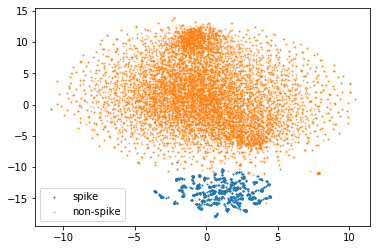

In [16]:
labels=seqs['is_spike'].values
plt.scatter(Y[labels][:,0],Y[labels][:,1],alpha=1,s=1)
plt.scatter(Y[~labels][:,0],Y[~labels][:,1],alpha=0.5,s=1)
plt.legend(['spike','non-spike'])

# Using trained model

In the previous section, we trained and used the model on the same set of reads. 
In this section, we will show using the model on new reads or references.

## reads example

In [15]:
#get reads from somewhere
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR107/004/ERR1072624/ERR1072624.fastq.gz

--2019-12-06 22:05:26--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR107/004/ERR1072624/ERR1072624.fastq.gz
           => ‘ERR1072624.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.192.7
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.192.7|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/ERR107/004/ERR1072624 ... done.
==> SIZE ERR1072624.fastq.gz ... 1094892
==> PASV ... done.    ==> RETR ERR1072624.fastq.gz ... done.
Length: 1094892 (1.0M) (unauthoritative)

ERR1072624.fastq.gz 100%[===================>]   1.04M   765KB/s    in 1.4s    

2019-12-06 22:05:31 (765 KB/s) - ‘ERR1072624.fastq.gz’ saved [1094892]



In [18]:
!gunzip ERR1072624.fastq.gz

In [19]:
#convert to seq file
!python ../../scripts/fastseq/fastqToSeq.py -i ERR1072624.fastq -o ERR1072624.seq

In [20]:
!head -n 3 ERR1072624.seq

1	ERR1072624.1 10317.000001002_0/1	TACGTAGGTGGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCATGTAGGCGGCTTAATAAGTCGAGCGTGAAAATGCGGGGCTCAACCCCGTATGGCGCTGGAAACTGTTAGGCTTGAGTGCAGGAGAGGAAAGGGGAATTCCCAGTG
2	ERR1072624.2 10317.000001002_1/1	TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGAATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTATGGTAGAGGGTAGTGGAATTTCCTGT
3	ERR1072624.3 10317.000001002_2/1	TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGAATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTATGGTAGAGGGTAGTGGAATTTCCTGT


In [23]:
#hash the seq 
!python ../../scripts/fastseq/hashSeq.py -i ERR1072624.seq --hash lsh -o ERR1072624.hash --lsh_file data.hash.lsh.pkl

2019-12-06 22:08:54,708 - hashSeq - INFO - start converting...
2019-12-06 22:08:54,708 - hashSeq - INFO - parameters: {'f': <function convert.<locals>.f at 0x7f557145d950>, 'lsh_file': 'data.hash.lsh.pkl', 'create_lsh_only': False, 'batch_size': 100000, 'hash_size': 22, 'out_file': 'ERR1072624.hash', 'in_file': 'ERR1072624.seq', 'n_thread': 7, 'kmer_size': 31, 'hash_fun': 'lsh', 'bucket': 20000000}
2019-12-06 22:08:54,708 - hashSeq - INFO - load lsh from file data.hash.lsh.pkl
100%|████████████████████████████████████| 17838/17838 [00:55<00:00, 324.08it/s]
2019-12-06 22:09:53,051 - hashSeq - INFO - written 17838 lines
2019-12-06 22:09:53,051 - hashSeq - INFO - finish converting...


In [24]:
!head -n 3 ERR1072624.hash

2029021 1294895 4071313 1534505 2921794 3542699 2002954 1505396 3554045 1325404 905318 1431382 3410479 2847801 2715238 3983063 2004351 2742057 3555285 1511438 823718 3502693 3069869 1505870 1513207 1454317 2119487 3618952 2006147 1713375 3626542 4011981 1266191 3988703 1286759 2916279 2341696 2438392 979494 2011223 1490408 2774529 2511379 1747463 3136690 1172095 2916732 1561636 1979604 2759775 3588655 3614451 3612239 3482743 1163877 2675327 997215 1474149 2920562 2536294 2015169 2334762 3172031 1074559 2925671 3078978 3546799 2782259 1388788 1410281 962631 92029 1358436 2528594 2005961 2115642 3332633 4070430 2907702 3513402 2666868 1849685 731213 2382390 767973 365294 2146023 1473217 1505921 3640515 1029576 3529326 3039007 1781645 1888334 1233946 3448518 3144554 2790947 3421271 1561212 1568894 1348476 417919 2554484 3030599 2442791 2442622 1536096 1719298 1319150 2987852 2463338 2388734 2025991 2011141 3484909 3612589 3933663 2006215 2323999 3355181 2053647 1934657 2014407 2587187 258

In [25]:
#make vectors
!cat ERR1072624.hash  | ../../lshvec  print-sentence-vectors model.bin > ERR1072624.vec

In [26]:
#look at the vectors
!head -n 3 ERR1072624.vec

0.065538 0.056076 -0.03199 0.0071287 0.0073033 0.096237 -0.039096 -0.048329 0.028521 0.024575 0.015163 0.056677 0.029457 -0.025788 -0.025395 0.052137 0.098992 -0.058963 0.035743 -0.054245 0.046092 -0.0078598 -0.0078661 0.041549 -0.014253 -0.08753 0.03307 0.028964 0.0038997 0.11623 0.046671 -0.023327 0.033476 -0.018676 -0.053407 -0.0051041 0.040898 -0.045182 -0.047433 0.075164 -0.024438 0.11355 0.03509 0.057711 0.036225 -0.060891 0.0466 0.021098 0.015639 0.064477 0.012129 0.076307 -0.0092952 -0.023724 0.0013731 0.040658 -0.013594 0.040035 0.10618 -0.030015 -0.054585 0.0089826 0.13537 0.089059 -0.0074087 -0.028272 -0.0073344 -0.020579 0.015576 -0.019388 -0.049089 -0.046456 0.0030726 -0.059543 0.004919 0.040363 -0.02618 -0.059026 0.040849 0.04161 0.013532 -0.052193 0.012397 0.013667 0.0033577 0.029928 0.083827 -0.016018 -0.056317 -0.008923 0.0060988 0.023541 0.011117 0.008787 0.057649 -0.026141 -0.094589 0.019208 0.012591 -0.10741 
0.06511 0.022087 -0.024801 0.0069433 0.028801 0.088133 -0

## reference example

It is actually same as reads (just take references as reads)

In [27]:
#get reference from somewhere, virus are used here for their short length
!wget ftp://ftp.ncbi.nih.gov/genomes/Viruses/achimota_rubulavirus_1_uid265896/NC_025403.fna
!wget ftp://ftp.ncbi.nih.gov/genomes/Viruses/acidianus_filamentous_virus_2_uid20965/NC_009884.fna

--2019-12-06 22:16:18--  ftp://ftp.ncbi.nih.gov/genomes/Viruses/achimota_rubulavirus_1_uid265896/NC_025403.fna
           => ‘NC_025403.fna’
Resolving ftp.ncbi.nih.gov (ftp.ncbi.nih.gov)... 130.14.250.10, 2607:f220:41e:250::11
Connecting to ftp.ncbi.nih.gov (ftp.ncbi.nih.gov)|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/Viruses/achimota_rubulavirus_1_uid265896 ... done.
==> SIZE NC_025403.fna ... 15913
==> PASV ... done.    ==> RETR NC_025403.fna ... done.
Length: 15913 (16K) (unauthoritative)

NC_025403.fna       100%[===================>]  15.54K  --.-KB/s    in 0.01s   

2019-12-06 22:16:19 (1.10 MB/s) - ‘NC_025403.fna’ saved [15913]

--2019-12-06 22:16:19--  ftp://ftp.ncbi.nih.gov/genomes/Viruses/acidianus_filamentous_virus_2_uid20965/NC_009884.fna
           => ‘NC_009884.fna’
Resolving ftp.ncbi.nih.gov (ftp.ncbi.nih.gov)... 130.14.250.10, 2607:f220:41e:250::11
Connecting t

In [47]:
#convert fasta file to seq format. Since I don't have a ready-to-use script, code it.
from Bio import SeqIO
def read_fasta(filepath):
    seq=""
    for seq_record in SeqIO.parse(filepath, "fasta"):
        if seq: seq +=  "NNNN"
        seq += str(seq_record.seq)
    return filepath, seq

refs = [read_fasta("NC_009884.fna"), read_fasta("NC_025403.fna")]
with open("virus_ref.seq", 'wt') as f:
    for i, (fp,seq) in enumerate(refs):
        f.write("{}\t{}\t{}\n".format(i+1,fp,seq))

In [49]:
#hash the seq 
!python ../../scripts/fastseq/hashSeq.py -i virus_ref.seq --hash lsh -o virus_ref.hash --lsh_file data.hash.lsh.pkl

2019-12-06 22:25:22,556 - hashSeq - INFO - start converting...
2019-12-06 22:25:22,556 - hashSeq - INFO - parameters: {'f': <function convert.<locals>.f at 0x7f880edf6950>, 'lsh_file': 'data.hash.lsh.pkl', 'create_lsh_only': False, 'batch_size': 100000, 'hash_size': 22, 'out_file': 'virus_ref.hash', 'in_file': 'virus_ref.seq', 'n_thread': 7, 'kmer_size': 31, 'hash_fun': 'lsh', 'bucket': 20000000}
2019-12-06 22:25:22,556 - hashSeq - INFO - load lsh from file data.hash.lsh.pkl
100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 59.02it/s]
2019-12-06 22:25:23,059 - hashSeq - INFO - written 2 lines
2019-12-06 22:25:23,060 - hashSeq - INFO - finish converting...


In [55]:
!head -n 3 virus_ref.hash |cut -c1-200

1981188 2447357 1156207 1471575 1307143 3084170 2756425 3460655 840786 3382648 3714428 1749765 3570519 2012946 214611 2676247 209740 2514491 1223239 422775 2460008 2399576 3578233 2021430 1497649 3552
3858067 1520997 3940022 2798902 2023187 1627190 2733948 2246011 3557927 3029665 3601007 2255899 176245 377983 193367 308823 2482027 2536292 3445862 1489124 1503871 3679247 3102535 653134 3558491 12862


In [56]:
#make vectors
!cat virus_ref.hash  | ../../lshvec  print-sentence-vectors model.bin > virus_ref.vec

In [58]:
#look at the vectors
!head -n 3 virus_ref.vec

0.056148 0.056934 -0.022931 0.0031992 0.016139 0.092811 -0.04622 -0.036074 0.038049 0.022168 0.007798 0.050782 0.023275 -0.025681 -0.025219 0.051455 0.097675 -0.047077 0.0067081 -0.065567 0.032403 0.013772 0.0086788 0.048637 -0.015351 -0.062762 0.030741 0.020055 0.017872 0.10976 0.036545 -0.0089377 0.041165 -0.022602 -0.034764 -0.017128 0.035278 -0.05875 -0.048973 0.047416 -0.036253 0.10807 0.032652 0.035734 0.025003 -0.080842 0.057022 0.019441 0.011013 0.039571 0.016255 0.05101 -0.012978 -0.0046726 0.019077 0.023385 -0.015923 0.03104 0.11015 -0.032414 -0.048461 0.016454 0.13725 0.06789 0.0069093 -0.03104 0.01189 -0.014841 0.013403 -0.038554 -0.063261 -0.056072 0.019838 -0.034719 0.0084461 0.025914 -0.027668 -0.052273 0.026668 0.036891 0.024775 -0.058896 0.011752 0.0033644 -0.0079324 0.034429 0.076287 8.359e-05 -0.057463 -0.015802 -0.01059 0.023789 0.0064972 0.0022477 0.058925 -0.048228 -0.057631 0.023032 -0.023505 -0.087542 
0.056774 0.053217 -0.018387 0.00050239 0.015853 0.094254 -0.